In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PyEMD import EMD, CEEMDAN

import emd

from sweep_design.axis import get_array_axis_from_array
from sweep_design.utility_functions import get_IMFs_emd
from sweep_design import Relation

from scipy.signal import hilbert, find_peaks, peak_prominences
from load_data import get_seismic_points, get_data_seismic_points

In [2]:
plt.show()

In [3]:
seismic_points_filename = '../data/Data_Apatit/system208.csv'
seismic_points_data_filename = '../data/Data_Apatit/D1HKT7CT.txt'

seismic_points = get_seismic_points(seismic_points_filename, delimiter=',', encoding='latin-1', skip_header = 1)
get_data_seismic_points(seismic_points_data_filename, seismic_points, delimiter='\t', skip_header=1)



Point with name '3023' is incorrect! Row: 30
Point with name '3217' is incorrect! Row: 31
['time, s' '2229_X' '2229_Y' '2229_Z' '1201_X' '1201_Y' '1201_Z' '1205_X'
 '1205_Y' '1205_Z' '0213_X' '0213_Y' '0213_Z' '0210_X' '0210_Y' '0210_Z'
 '2107_X' '2107_Y' '2107_Z' '1109_X' '1109_Y' '1109_Z' '0013_X' '0013_Y'
 '0013_Z' '0220_X' '0220_Y' '0220_Z' '9215_X' '9215_Y' '9215_Z' '9113_X'
 '9113_Y' '9113_Z' '1225_X' '1225_Y' '1225_Z' '2200_X' '2200_Y' '2200_Z'
 '1220_X' '1220_Y' '1220_Z' '1204_X' '1204_Y' '1204_Z' '9120_X' '9120_Y'
 '9120_Z']
Point with name 0213 is not found!
Point with name 0210 is not found!
Point with name 0013 is not found!
Point with name 0220 is not found!


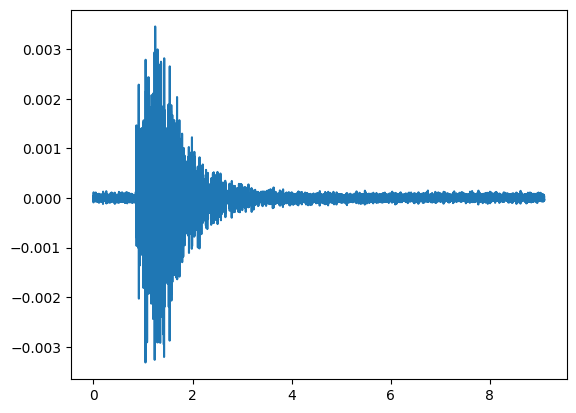

In [319]:
test_signal = seismic_points['1225'].data_components.x
plt.plot(*test_signal.get_data())

In [309]:
def hilbert_amplitude(trace: Relation):
    data_y = trace.y
    print(data_y)
    ht=hilbert(trace.y)
    amplitude = np.abs(ht)
    
    return Relation(trace.x, amplitude)

def envelop_signal(trace: Relation):
    
    envelop =  emd.sift.interp_envelope(trace.y, mode='upper')
    if envelop is None:
        return

    index = np.unravel_index(np.argmax(envelop), envelop.shape)[0]
    if index == 0 or index is None: 
        return 
    envelop_signal = Relation(trace.x, envelop)
    envelop_signal = envelop_signal[:trace.x.array[index]]
    # # extrema_output = emd.find_extrema(*trace.get_data())
    for _ in range(2):
        envelop_signal = envelop_signal.diff()
        buff_index = np.unravel_index(np.argmax(envelop_signal.y), envelop_signal.y.shape)[0]
        if buff_index == 0:
            continue
        index = buff_index
        envelop_signal = envelop_signal[:trace.x.array[index]]
    # diff_max = np.where(diff2.y < 0, diff.y[:-1], 0)
    print(index)
    return (trace.x.array[index], envelop[index])
    # max_loc, max_mag = emd.sift.get_padded_extrema(trace.y, pad_width = 0, mode = 'abs_peak')
    # if max_loc is None:
    #     return
    # return (trace.x.array[max_loc], max_mag)

In [323]:
imfs = get_IMFs_emd(1000*test_signal)

1242
1062
968
1213
1277
1248
(1.168, -0.00213146209716797)


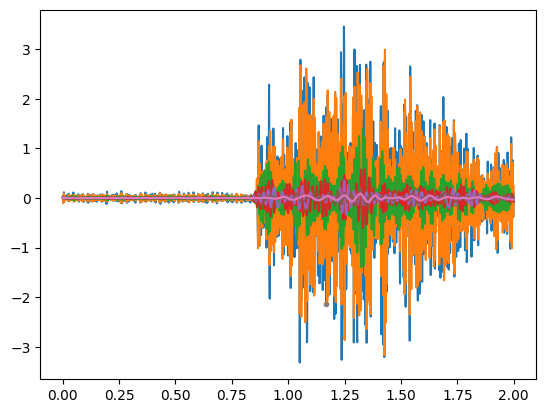

In [333]:
time_first =  []
len_imfs = len(imfs)-6
plt.plot(*(1000*test_signal)[:2].get_data())
for imf in imfs[:-len_imfs]:
    data = envelop_signal(imf)
    if data is None:
        continue
    # ht = ht[0:2]
    # peaks, _ = find_peaks(ht.y)
    # prominences = peak_prominences(ht.y, peaks)[0]
    # print(prominences)
    # plt.plot(*ht[prominences[0]], "x")
    # plt.plot(*ht[0:2].diff().get_data())
    # plt.plot(*imf[0:2].get_data())
    time_first.append(data[0])
    # plt.plot(*data, '.')
    plt.plot(*imf[:2].get_data())

result_time = np.array(time_first).mean()
result = test_signal[result_time]
print(result)
plt.plot(*(1000*test_signal)[result_time], '.')

In [168]:
len(imfs)

8